In [41]:
import pandas as pd
import ast

# Read the data from the CSV file
df = pd.read_csv("./TestData.csv")

# Convert string representations of lists to actual lists
df["inference_dev"] = df["inference_dev"].apply(lambda x: ast.literal_eval(x))
df["inference_edge"] = df["inference_edge"].apply(lambda x: ast.literal_eval(x))

# Expand the lists into separate columns
df = pd.concat([df, pd.DataFrame(df['inference_dev'].tolist()).add_suffix('_inference_dev')], axis=1)
df = pd.concat([df, pd.DataFrame(df['inference_edge'].tolist()).add_suffix('_inference_edge')], axis=1)

# Remove the original "inference_dev" and "inference_edge" columns
df.drop(["inference_dev", "inference_edge"], axis=1, inplace=True)

# Display the DataFrame
df.to_csv("preprocTestData.csv", index=False)

In [42]:
import pandas as pd
import ast

# Read the data from the CSV file
df = pd.read_csv("./preprocTestData.csv")
df

,message_uiid,nn_id,algo_id,avg_speed,avg_latency,chosen_offloading_layer,model_loading_time,update_time,synt_load_edge,synt_latency,...,6_inference_dev,7_inference_dev,0_inference_edge,1_inference_edge,2_inference_edge,3_inference_edge,4_inference_edge,5_inference_edge,6_inference_edge,7_inference_edge
0,decc91d3-754f-b6ec-87d5-af99c984b6fe,2,0.0.0,18812.150107,0.083776,0,0.249815,0.005788,1.7,6.993890,...,2.368,2.180,3.213529,13.818235,5.067647,2.931765,1.751176,7.768235,1.392941,1.282353
1,74ed3d32-133e-f23d-c52a-445962327520,2,0.0.0,7158.460076,0.220159,0,0.158742,0.005723,1.7,8.420858,...,2.141,2.183,3.836471,13.085882,5.076471,2.926471,1.755294,8.251176,1.259412,1.284118
2,4fd3bee3-9523-727a-4d22-2b46418ef4fd,2,0.0.0,1160.878491,1.364484,5,0.138779,0.005451,1.7,26.732232,...,2.139,12.417,3.952941,13.085294,5.070588,3.693529,1.753529,7.621176,1.258235,7.304118
3,482c9bf2-720f-f8bc-c9be-3d895ba85761,2,0.0.0,4538.345137,0.347263,0,0.204758,0.004479,1.7,7.474621,...,2.140,2.180,3.220588,13.688235,5.074706,2.930000,1.751176,7.631765,1.258824,1.282353
4,73cd2132-07dd-e92d-b7f0-0b39245bff9d,2,0.0.0,11991.256546,0.131429,0,0.141949,0.004364,1.7,27.797173,...,2.141,2.179,3.946471,13.786471,5.071765,2.930000,1.751176,7.619412,1.259412,1.281765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,1ef6b0f3-98a9-dd4b-a8fd-f418191c4231,1,0.0.0,4706.737325,0.331440,0,0.224611,0.006562,1.7,15.022581,...,3.835,9.287,2.942941,4.885294,2.936471,1.765294,1.432353,1.444118,2.255882,5.462941
1357,35946812-4ac9-64aa-36fd-3e185fb0a131,1,0.0.0,3483.723018,0.447797,2,0.197760,0.006672,1.7,22.005390,...,4.675,8.034,2.905882,4.313529,3.490588,1.768824,1.430588,1.448235,2.750000,4.725882
1358,c10a5bd3-3adc-c12c-9e00-95f8b473ff5d,1,0.0.0,1456.496053,1.076556,3,0.220133,0.008639,1.7,21.256696,...,4.581,9.112,2.902941,4.821765,2.940588,1.764118,1.434706,7.477059,2.694706,5.360000
1359,1f664d83-2592-962b-6e17-73269378705f,1,0.0.0,368.327432,4.235362,7,0.191367,0.005919,1.7,17.012656,...,3.526,8.928,3.136471,4.447059,2.935882,1.767059,1.432353,1.443529,2.074118,5.251765


In [43]:
df['chosen_offloading_layer'] = df['chosen_offloading_layer'].astype(int)

In [44]:

for index, row in df.iterrows():
    chosen_offloading_layer = row['chosen_offloading_layer']
    offloading_inf_cols = []
    for i in range(0,7):
        if i < chosen_offloading_layer:
            offloading_inf_cols.append(f"{i}_inference_dev") 
        else:
            offloading_inf_cols.append(f"{i}_inference_edge")
           

    
    # Calculate 'total_time_with_offloading' for the current row and update the DataFrame
    df.at[index, 'total_time_with_offloading'] = df.loc[index, offloading_inf_cols].sum()

    inference_dev_cols = [f"{i}_inference_dev" for i in range(0,7)]
    df.at[index, 'total_time_no_offloading_dev'] = df.loc[index, inference_dev_cols].sum()
    
    inference_edge_cols = [f"{i}_inference_edge" for i in range(0,7)]
    df.at[index,'total_time_fast_offloading_edge'] = df.loc[index, inference_edge_cols].sum()


df['time_saved'] = df['total_time_no_offloading_dev'] - df['total_time_with_offloading']
df.to_csv("full_data.csv", index=False)

df[["nn_id","avg_latency", "offloaded_layer_data_size","chosen_offloading_layer","total_time_fast_offloading_edge", "total_time_no_offloading_dev", "total_time_with_offloading", "time_saved"]]

,nn_id,avg_latency,offloaded_layer_data_size,chosen_offloading_layer,total_time_fast_offloading_edge,total_time_no_offloading_dev,total_time_with_offloading,time_saved
0,2,0.083776,81920.0,0,35.943529,61.104,35.943529,25.160471
1,2,0.220159,81920.0,0,36.191176,61.525,36.191176,25.333824
2,2,1.364484,4352.0,5,36.435294,61.940,55.724412,6.215588
3,2,0.347263,81920.0,0,35.555294,60.444,35.555294,24.888706
4,2,0.131429,81920.0,0,36.364706,61.820,36.364706,25.455294
...,...,...,...,...,...,...,...,...
1356,1,0.331440,40960.0,0,17.662353,30.026,17.662353,12.363647
1357,1,0.447797,66560.0,2,18.107647,30.783,23.161235,7.621765
1358,1,1.076556,16896.0,3,24.035882,40.861,31.501588,9.359412
1359,1,4.235362,266240.0,7,17.236471,29.302,29.302000,0.000000


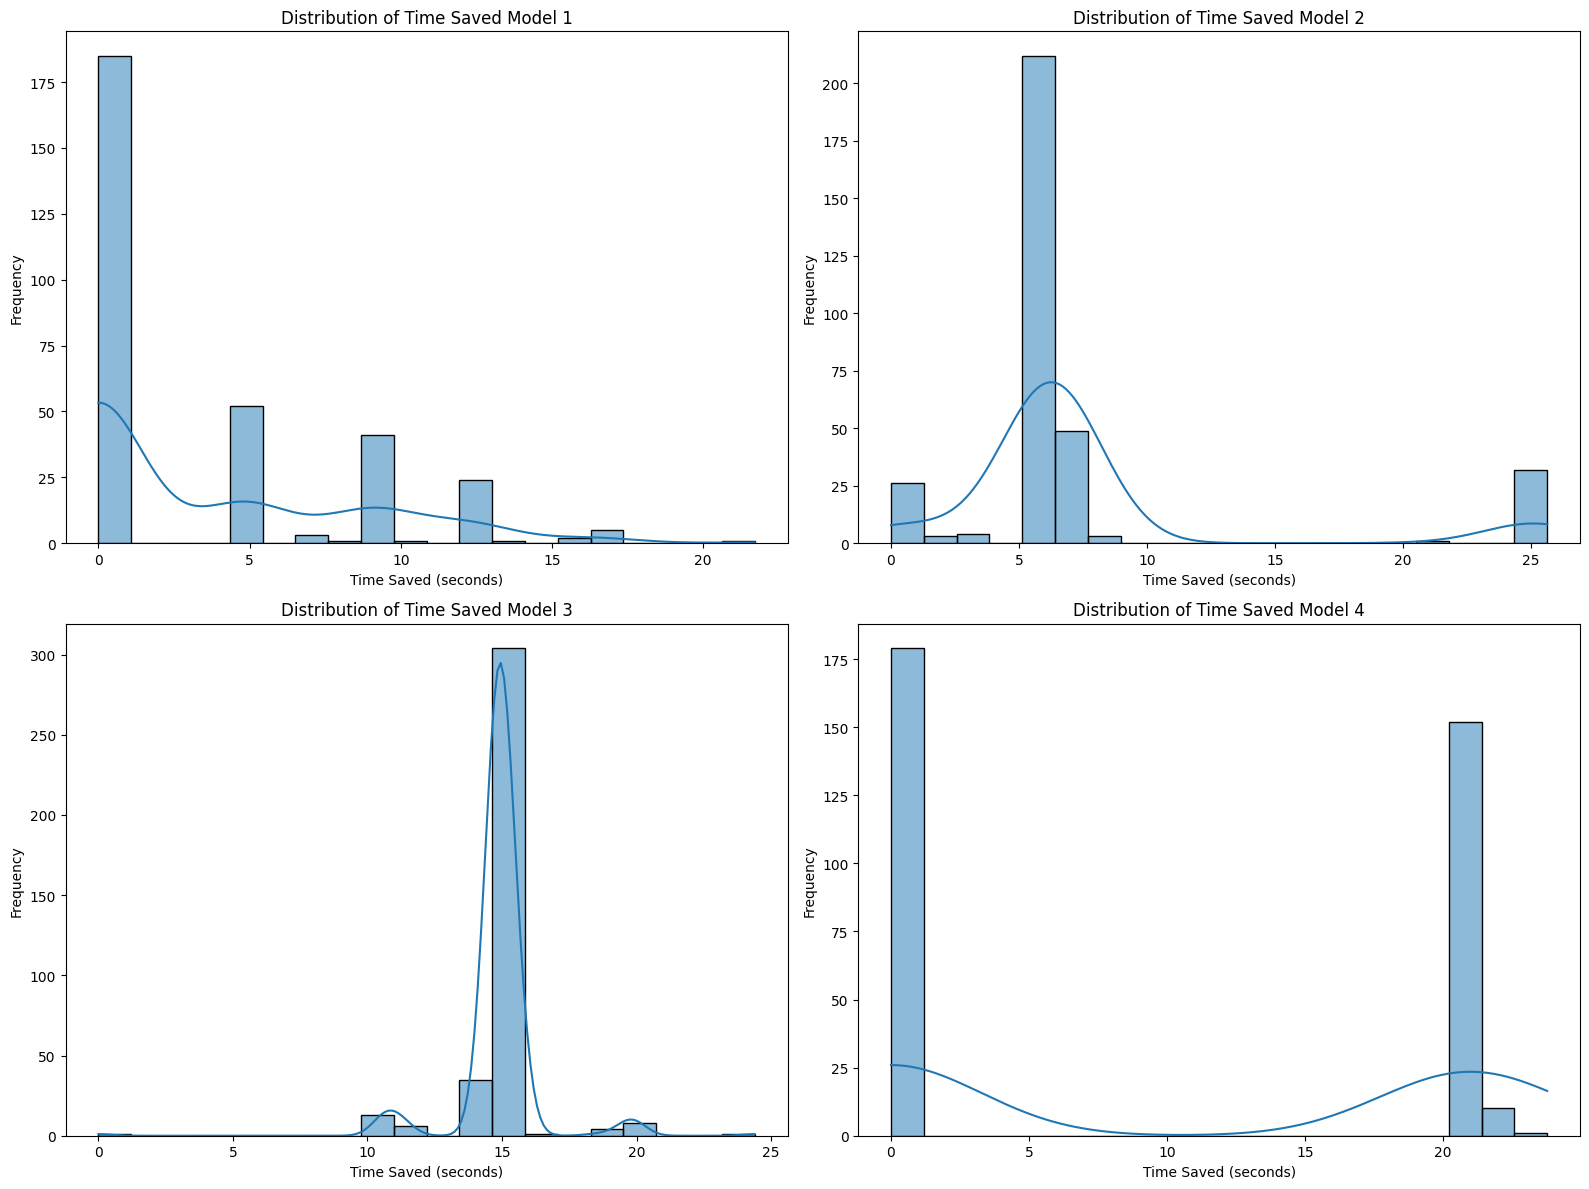

In [45]:


import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# Define model IDs
model_ids = [1, 2, 3, 4]
for i, nn_id in enumerate(model_ids):
    row, col = divmod(i, 2)  # Calculate the row and column for the current subplot

    # Filter the DataFrame for the current model
    df_model = df[df['nn_id'] == nn_id]

    # Plot the histogram on the current subplot
    sns.histplot(df_model['time_saved'], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of Time Saved Model {nn_id}')
    axes[row, col].set_xlabel('Time Saved (seconds)')
    axes[row, col].set_ylabel('Frequency')

# Add spacing between the subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [46]:
df_model = df[df['nn_id'] == 1]
print(df_model.shape)

df_model = df[df['nn_id'] == 2]
print(df_model.shape)

df_model = df[df['nn_id'] == 3]
print(df_model.shape)

df_model = df[df['nn_id'] == 4]
print(df_model.shape)

(316, 32)
(330, 32)
(373, 32)
(342, 32)


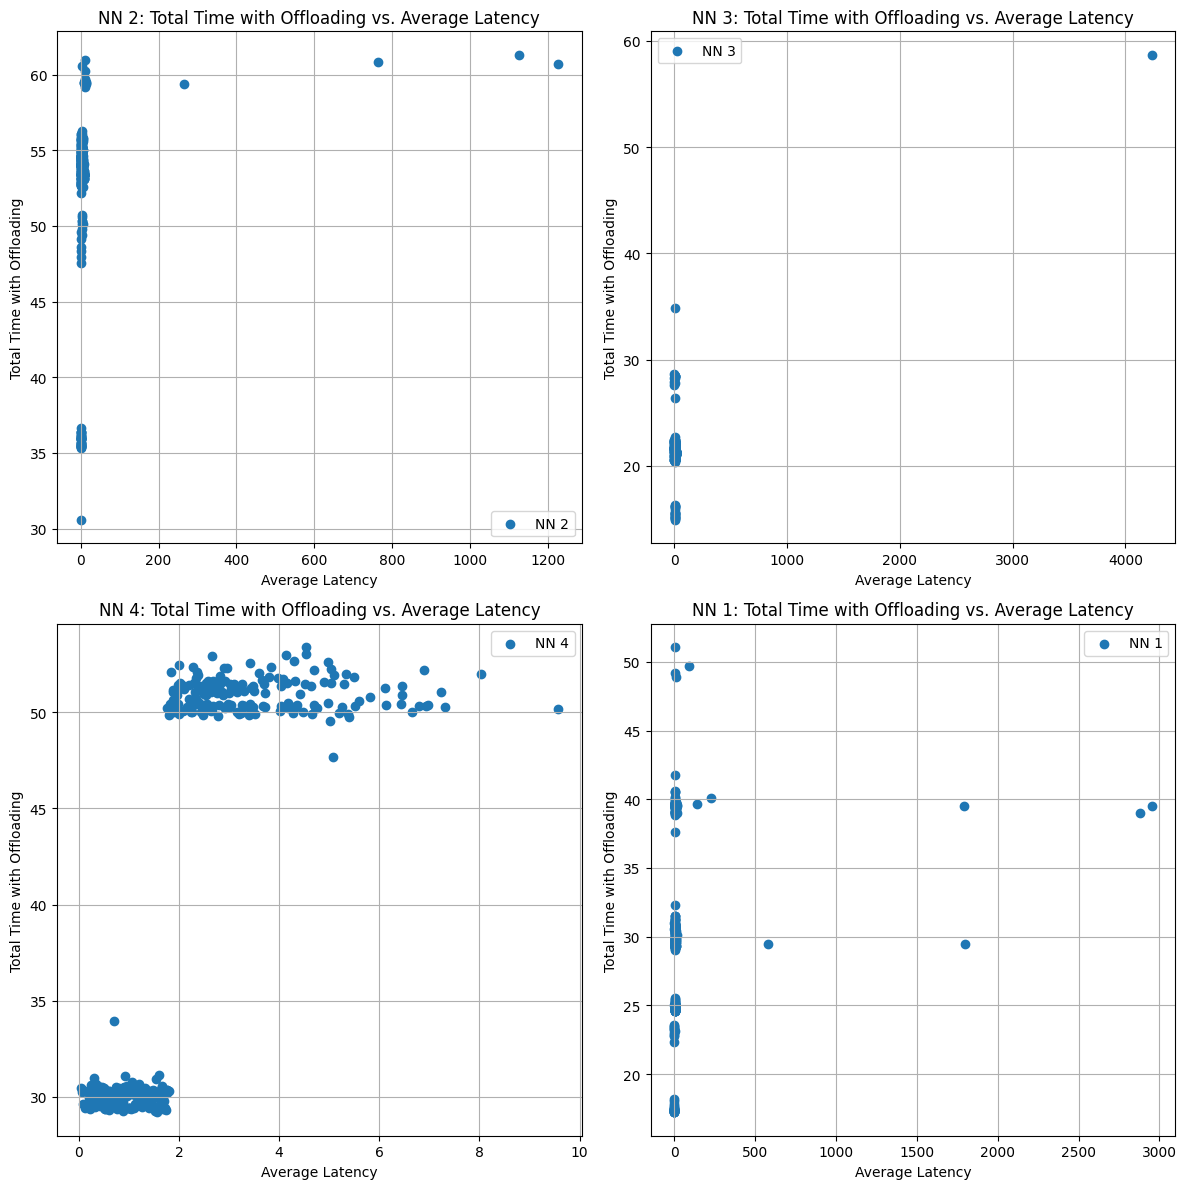

In [47]:
import matplotlib.pyplot as plt

# Data (Assuming you have a DataFrame 'df' with multiple nn_id)
nn_ids = df["nn_id"].unique()

# Create a 2x2 subplot for each nn_id
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, nn_id in enumerate(nn_ids):
    ax = axes[i // 2, i % 2]  # Get the appropriate subplot
    data_subset = df[df["nn_id"] == nn_id]
    avg_latency = data_subset["avg_latency"]
    total_time_with_offloading = data_subset["total_time_with_offloading"]

    # Create a scatter plot in the current subplot
    ax.scatter(avg_latency, total_time_with_offloading, label=f"NN {nn_id}")
    ax.set_xlabel("Average Latency")
    ax.set_ylabel("Total Time with Offloading")
    ax.set_title(f"NN {nn_id}: Total Time with Offloading vs. Average Latency")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


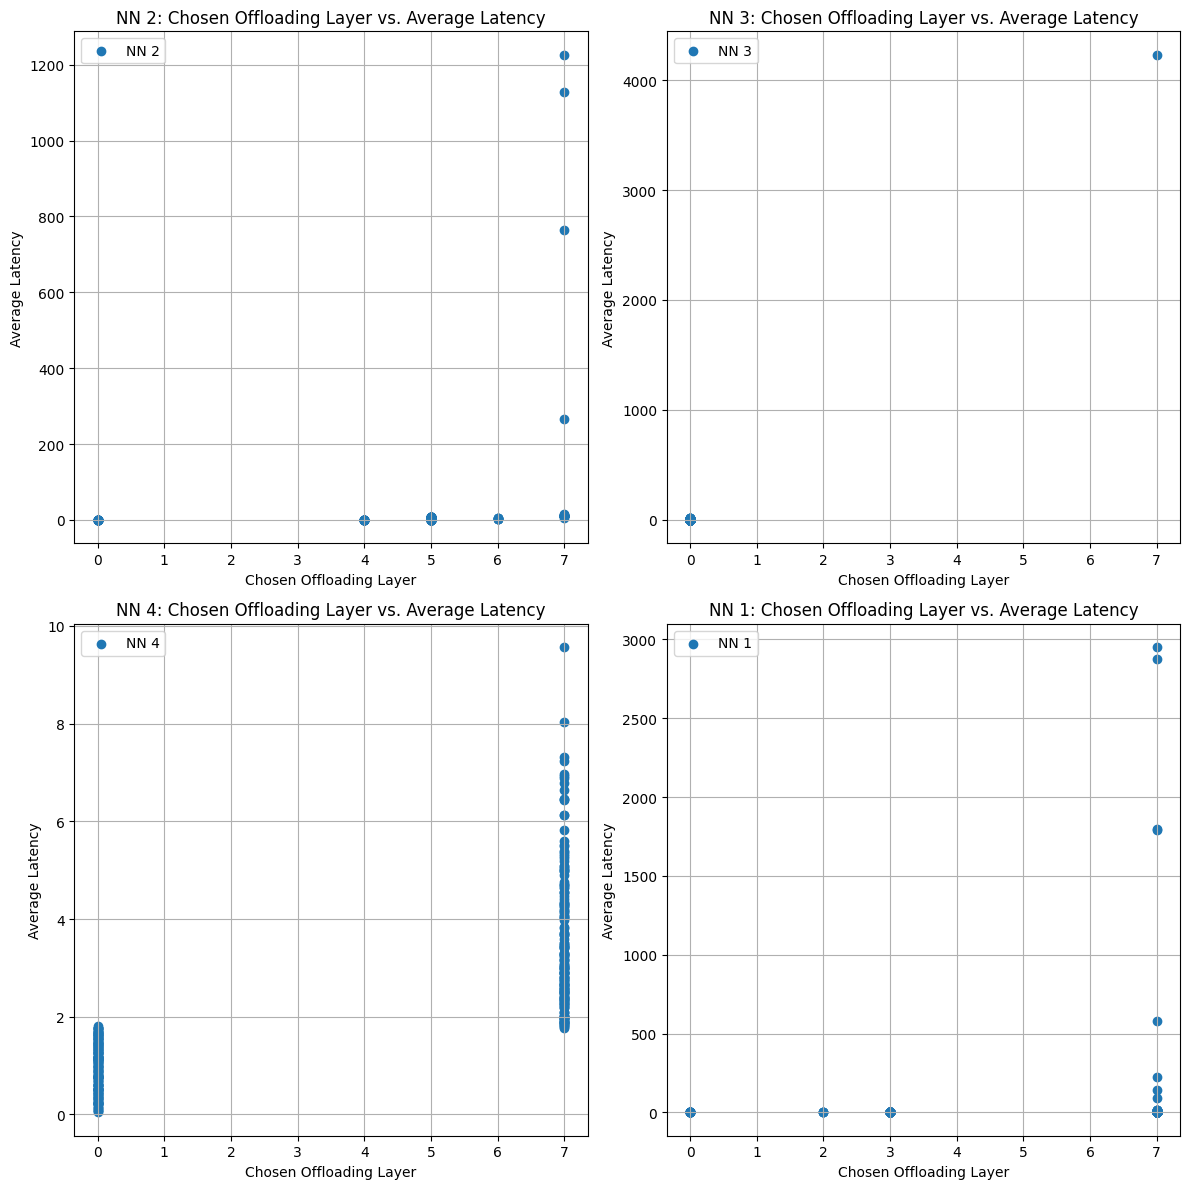

In [48]:
import matplotlib.pyplot as plt

# Data (Assuming you have a DataFrame 'df' with multiple nn_id)
nn_ids = df["nn_id"].unique()

# Create a 2x2 subplot for each nn_id
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, nn_id in enumerate(nn_ids):
    data_subset = df[df["nn_id"] == nn_id]
    chosen_offloading_layer = data_subset["chosen_offloading_layer"].astype(int)
    avg_latency = data_subset["avg_latency"]

    # Create a scatter plot in the current subplot
    ax = axes[i // 2, i % 2]  # Get the appropriate subplot
    ax.scatter(chosen_offloading_layer, avg_latency, label=f"NN {nn_id}")
    ax.set_xlabel("Chosen Offloading Layer")
    ax.set_ylabel("Average Latency")
    ax.set_title(f"NN {nn_id}: Chosen Offloading Layer vs. Average Latency")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


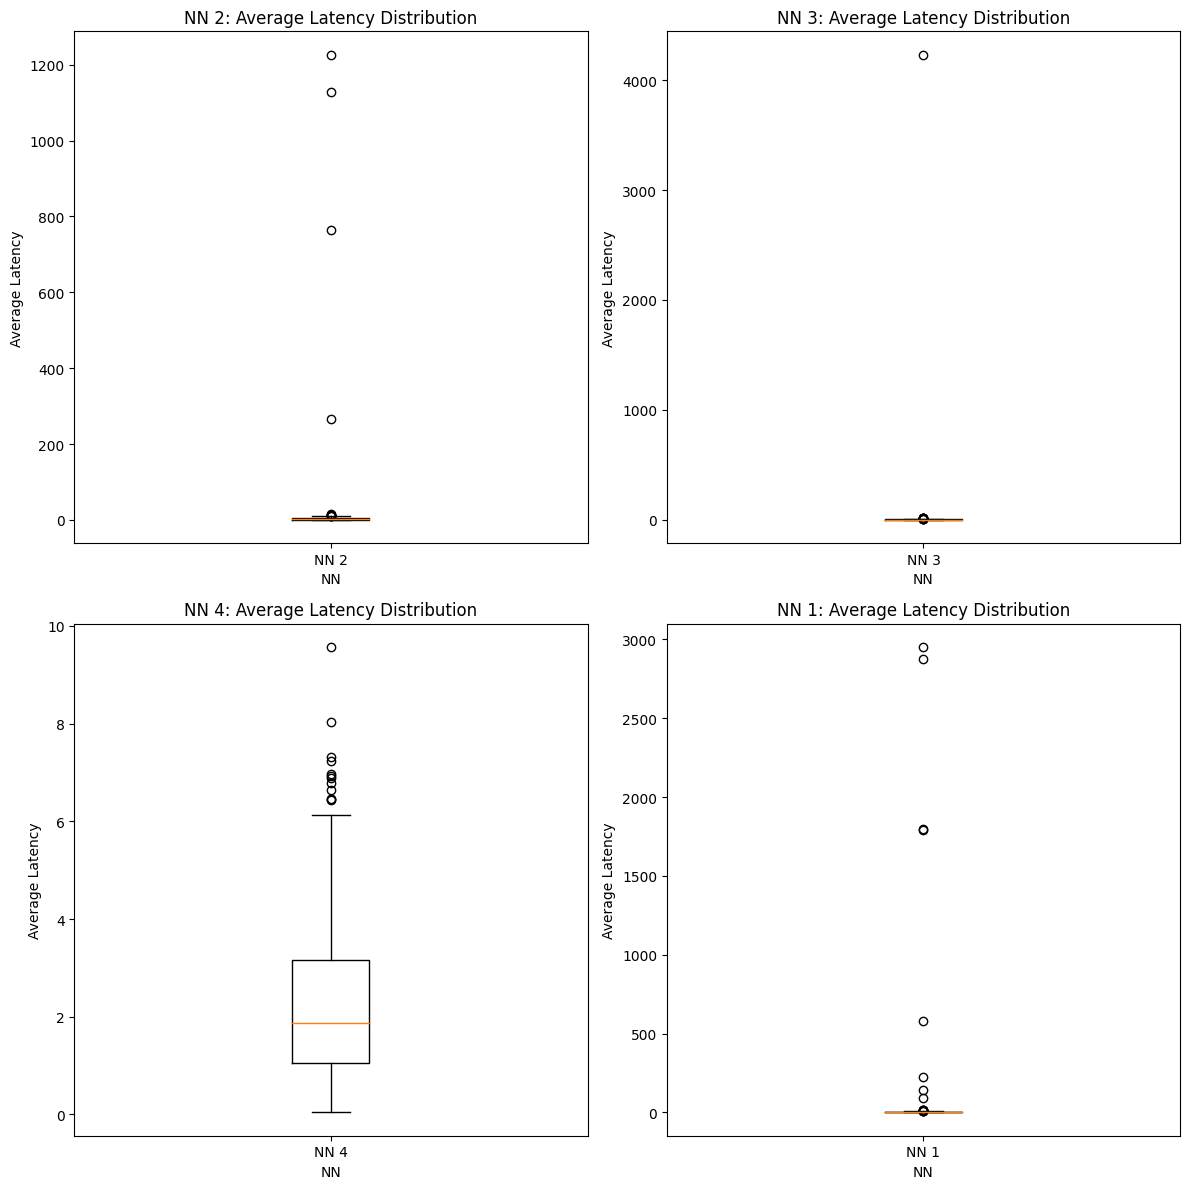

In [49]:
import matplotlib.pyplot as plt

# Data (Assuming you have a DataFrame 'df' with multiple nn_id)
nn_ids = df["nn_id"].unique()

# Create a 2x2 subplot for each nn_id
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, nn_id in enumerate(nn_ids):
    data_subset = df[df["nn_id"] == nn_id]
    chosen_offloading_layer = data_subset["chosen_offloading_layer"].astype(int)
    avg_latency = data_subset["avg_latency"]

    # Create a box plot in the current subplot
    ax = axes[i // 2, i % 2]  # Get the appropriate subplot
    ax.boxplot(avg_latency, labels=[f"NN {nn_id}"])
    ax.set_xlabel("NN")
    ax.set_ylabel("Average Latency")
    ax.set_title(f"NN {nn_id}: Average Latency Distribution")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


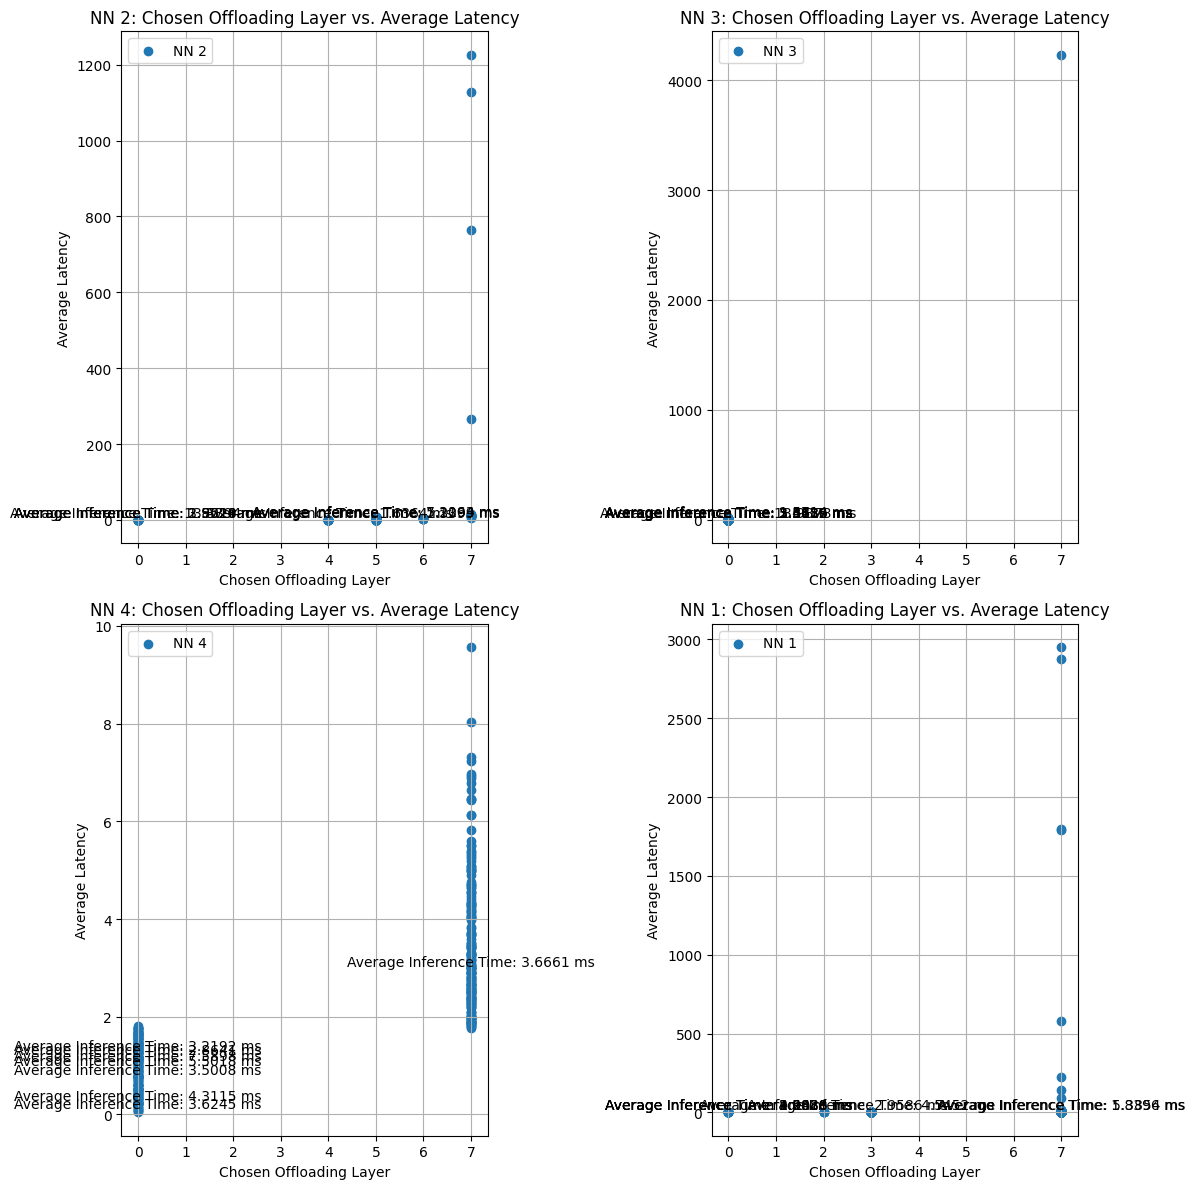

In [50]:
import matplotlib.pyplot as plt

# Data (Assuming you have a DataFrame 'df' with multiple nn_id)
nn_ids = df["nn_id"].unique()

# Create a 2x2 subplot for each nn_id
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, nn_id in enumerate(nn_ids):
    data_subset = df[df["nn_id"] == nn_id]
    chosen_offloading_layer = data_subset["chosen_offloading_layer"].astype(int)
    avg_latency = data_subset["avg_latency"]
    
    # Extract and calculate average inference times for each layer
    layer_inference_averages = []
    for layer_index in range(9):  # Assuming 0 to 8 layers
        column_name = f"{layer_index}_inference_edge"
        if column_name in data_subset:
            layer_inference = data_subset[column_name]
            average_inference = layer_inference.mean()
            layer_inference_averages.append(average_inference)

    # Create a scatter plot in the current subplot
    ax = axes[i // 2, i % 2]  # Get the appropriate subplot
    ax.scatter(chosen_offloading_layer, avg_latency, label=f"NN {nn_id}")

    # Add data about average inference time as text labels at each data point
    for x, y, avg_inference in zip(chosen_offloading_layer, avg_latency, layer_inference_averages):
        ax.text(x, y, f"Average Inference Time: {avg_inference:.4f} ms", fontsize=10, ha='center', va='bottom')

    ax.set_xlabel("Chosen Offloading Layer")
    ax.set_ylabel("Average Latency")
    ax.set_title(f"NN {nn_id}: Chosen Offloading Layer vs. Average Latency")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()